# Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Load the German Credit Dataset

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "EmploymentSince", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age",
    "OtherInstallmentPlans", "Housing", "NumberExistingCredits",
    "Job", "NumberPeopleMaintenance", "Telephone", "ForeignWorker", "Target"
]
df = pd.read_csv(url, sep=' ', header=None, names=columns)

# 2. Preprocessing
# Convert target: 1 (Good credit risk), 2 (Bad credit risk)

In [6]:
df['Target'] = df['Target'].map({1: 1, 2: 0})

# Encode categorical variables

In [7]:
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

# Feature scaling

In [8]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Target')
df[num_cols] = scaler.fit_transform(df[num_cols])

# 3. Train-Test Split with Stratification

In [9]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 4. Baseline Decision Tree Model

In [10]:
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_base)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.724


# 5. Visualize Tree (depth limited to 3 for readability)

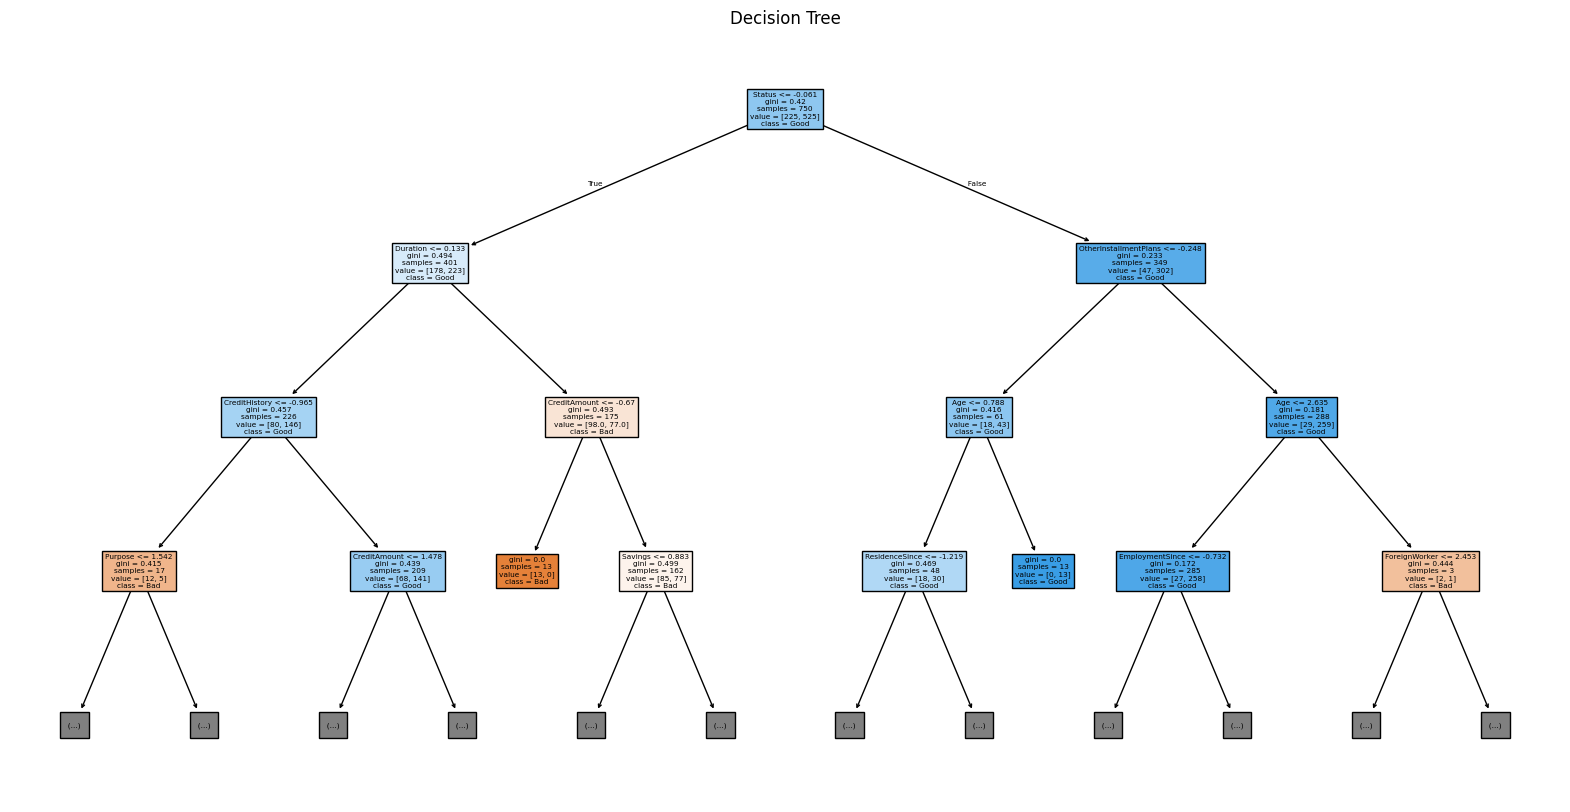

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(baseline_model, feature_names=X.columns, class_names=["Bad", "Good"],
          filled=True, max_depth=3)
plt.title("Decision Tree")
plt.show()

# 6. Hyperparameter Tuning with GridSearchCV

In [12]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# Best Parameters and Accuracy

In [13]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


# Final model

In [14]:
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Tuned Model Accuracy:", final_accuracy)

Tuned Model Accuracy: 0.776


# Detailed evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.59        75
           1       0.82      0.87      0.85       175

    accuracy                           0.78       250
   macro avg       0.73      0.71      0.72       250
weighted avg       0.77      0.78      0.77       250



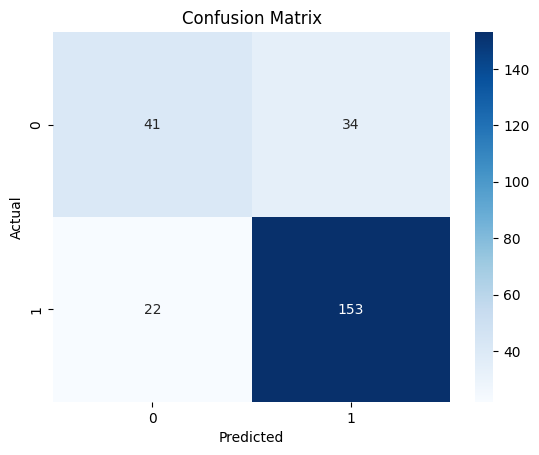

In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Building a Predictive system

In [16]:
user_input = {
    'Status': 'A12',
    'Duration': 24,
    'CreditHistory': 'A34',
    'Purpose': 'A43',
    'CreditAmount': 2500,
    'Savings': 'A61',
    'EmploymentSince': 'A73',
    'InstallmentRate': 2,
    'PersonalStatusSex': 'A93',
    'OtherDebtors': 'A101',
    'ResidenceSince': 3,
    'Property': 'A121',
    'Age': 35,
    'OtherInstallmentPlans': 'A143',
    'Housing': 'A152',
    'NumberExistingCredits': 1,
    'Job': 'A173',
    'NumberPeopleMaintenance': 1,
    'Telephone': 'A191',
    'ForeignWorker': 'A201'
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Encode categorical variables using the same LabelEncoder used before
for col in cat_cols:
    input_df[col] = label_encoders[col].transform(input_df[col]) 
# Scale numerical features using the same scaler
input_df[num_cols] = scaler.transform(input_df[num_cols])


prediction = final_model.predict(input_df)[0]

# Output
print("Prediction for new applicant:")
print("Good Credit Risk" if prediction == 1 else "Bad Credit Risk")
    

Prediction for new applicant:
Bad Credit Risk
